<a href="https://colab.research.google.com/github/clemencia/ML4PPGF_UERJ/blob/master/ajustes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teste de Hipótese e Goodness of Fit

No exemplo abaixo, geramos uma distribuição Gaussiana, realizamos um ajuste na distribução, comparamos os valores obtidos dos parâmetros com os usados na geração e obtemos a **qualidade** do ajuste através do teste de $\chi^{2}$ e *p-value*. 

Lembrando da [Aula 4](https://http://dfnae.fis.uerj.br/twiki/pub/DFNAE/ML4PPGF/Aula4_HipotesesEFits.pdf):

\begin{equation*}
\chi^{2} = \sum_i^{N}\frac{(n_{obs} - n_{expected})^2}{n_{expected}}
\end{equation*}

onde:

* $n_{obs}$: número de eventos por bin
* $n_{expected}$: número de eventos esperados (de acordo com um certo modelo)
* $N$: número de bins

\\
O valor **$\chi^{2}$/número de graus de liberdade** é uma medida da qualidade de um ajuste.

\

O **número de graus de liberdade** é determinado como sendo o número total de bins, N, subtraído do número de parâmetros da função de ajuste.


O *p-value* é esperado ser uma variável aleatória uniformemente distribuída entre 0 e 1 (assumindo-se que os dados seguem uma distribuição Gaussiana). Um valor de *p-value* pequeno pode ser uma indicação de uma descrição ruim dos dados pelo modelo escolhido (função de ajuste).

[10.02993638  2.45972017]
[0.00109729 0.00096649]


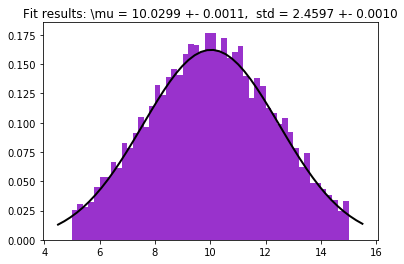

chi_sq/ndof =  0.07696295369163794
chi2/ndof =  0.07696295369163794  , p-value =  1.0


In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats

def gaussian(u, mean, sigma):
   return  1/(( 2*np.pi )**0.5*sigma)*np.exp( -(u-mean)**2/(2*sigma**2) ) 
  
def chisq(expected, observed):
  """função para calcular chi2
     toma como input o objeto expected (numpy array) obtido com matplotlib.pyplot
     e observed: numpy array com os valores da função obtida com o ajuste
  """
  Chi2 = 0
  for i in range(expected.shape[0]):
    if expected[i] != 0:
      Chi2 = Chi2 + (observed[i] - expected[i])**2/expected[i]
  return Chi2

# Gerar dados distribuidos de acordo com uma gaussiana.
mean=10.
sigma=2.5
N=10000
data = norm.rvs(loc=mean, scale=sigma, size=N)

# Plotar o histograma.
nbins = 50
histogram = plt.hist(data, bins=nbins, color='darkorchid', range=(5, 15), density=1) #density=True
x = 0.5*( histogram[1][0:-1] + histogram[1][1:] )
y=histogram[0]
#print(max(y))
    
  
# Fazer o ajuste de uma distribuição gaussiana aos dados. 
# O retorno da função são os parâmetros ajustados, 
# mu (valor esperado) e std (desvio padrão):
mu, std = norm.fit(data)
##normalization = N
##initials = [mu, std, normalization]
initials=[mu, std]
best, covariance = curve_fit(gaussian, x, y, p0=initials, sigma=np.sqrt(y))
error = np.diag(covariance)
print(best)
print(error)


# Plotar a PDF.
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, nbins)
p = gaussian(xx, best[0], best[1])
plt.plot(xx, p,'k',linewidth=2)
title = r"Fit results: \mu = {:.4f} +- {:.4f},  std = {:.4f} +- {:.4f}".format(best[0], error[0], best[1], error[1])
plt.title(title)

plt.show()

# obtenção do chi2. Atenção: a função scipy.stats.chisquare não funciona para os bins
# em que (f_obs - f_exp) < 5.
chi2, pvalue = scipy.stats.chisquare(f_obs=gaussian(xx, *best), f_exp=histogram[0], ddof=len(best)) 
chi_sq = chisq(histogram[0], gaussian(xx, *best))  #chi2 calculado "à mão". 
print("chi_sq/ndof = ", chi_sq/len(best))
print("chi2/ndof = ", chi2/len(best), " , p-value = ", pvalue)

**Exercício 1:** Modifique o código acima para, ao invés de usar o método _scipy.stats.norm.rvs_ para gerar a pdf, você próprio escreva uma função de geração de números aleatórios, distribuídos de acordo com uma Gaussiana.

**Exercício 2:** Gere uma PDF da Breit-Wigner com o método da inversão, realize o ajuste na distribuição e o teste de qualidade do ajuste, $\chi^2$.